Fikko Muharavid Y. M.
(21051214004)

---

Kelas   : SI 2021B

---

Dataset Seeds

## **Import Dataset**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import plotly.graph_objects as go
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seeds.csv')
dataset.head()

Mounted at /content/drive


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## **Pre-Processing**

Menghapus Data Duplikat

In [ ]:
duplicate_rows = dataset[dataset.duplicated()]
print("Data Duplikat:")
print(duplicate_rows)
seed_nd_df = dataset.drop_duplicates().reindex()
print("\nData tanpa duplikat:")
seed_nd_df.head()

Data Duplikat:
Empty DataFrame
Columns: [Area, Perimeter, Compactness, Length of Kernel, Width of Kernel, Asymmetry Coefficient, Length of Kernel Groove, Class]
Index: []

Data tanpa duplikat:


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Menghapus Data Hilang

In [ ]:
missing_data = seed_nd_df.isnull().sum()
print("Data yang Hilang:\n", missing_data)
seed_clean = seed_nd_df.dropna()

Data yang Hilang:
 Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry Coefficient      0
Length of Kernel Groove    0
Class                      0
dtype: int64


Pemilihan Fitur/Atribut Penting

In [ ]:
print("Uji Korelasi Pearson:")
correlation_matrix = seed_clean.corr()
print(correlation_matrix)

print("\nMentukan tingkat korelasi antara atribut dengan target:")
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print(correlation_with_target)

print("\nMenampilkan datasets atribut/fitur penting:\n")
seed_clean = seed_clean.drop(columns='Compactness', axis=1)
seed_clean = seed_clean.drop(columns='Width of Kernel', axis=1)
seed_clean = seed_clean.drop(columns='Area', axis=1)
print(seed_clean)
X = seed_clean


Uji Korelasi Pearson:
                             Area  Perimeter  Compactness  Length of Kernel  \
Area                     1.000000   0.994341     0.608288          0.949985   
Perimeter                0.994341   1.000000     0.529244          0.972422   
Compactness              0.608288   0.529244     1.000000          0.367915   
Length of Kernel         0.949985   0.972422     0.367915          1.000000   
Width of Kernel          0.970771   0.944829     0.761635          0.860415   
Asymmetry Coefficient   -0.229572  -0.217340    -0.331471         -0.171562   
Length of Kernel Groove  0.863693   0.890784     0.226825          0.932806   
Class                   -0.346058  -0.327900    -0.531007         -0.257269   

                         Width of Kernel  Asymmetry Coefficient  \
Area                            0.970771              -0.229572   
Perimeter                       0.944829              -0.217340   
Compactness                     0.761635              -0.331471  

## **K-Mean**

<function matplotlib.pyplot.show(close=None, block=None)>

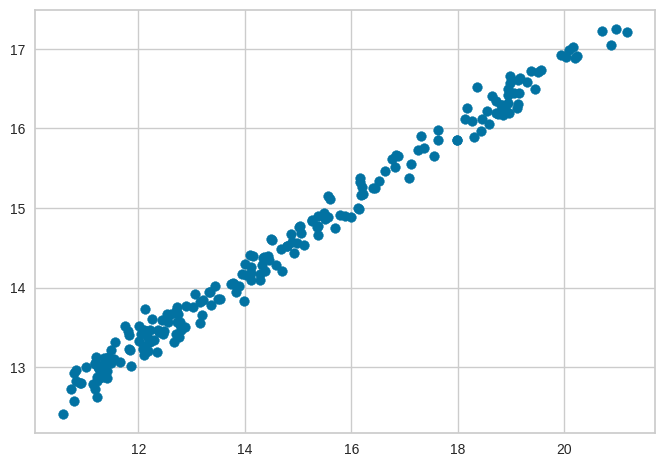

In [ ]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.show

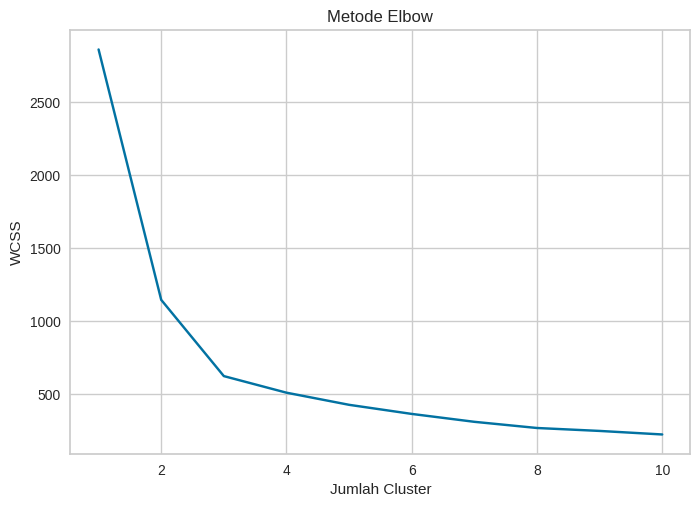

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

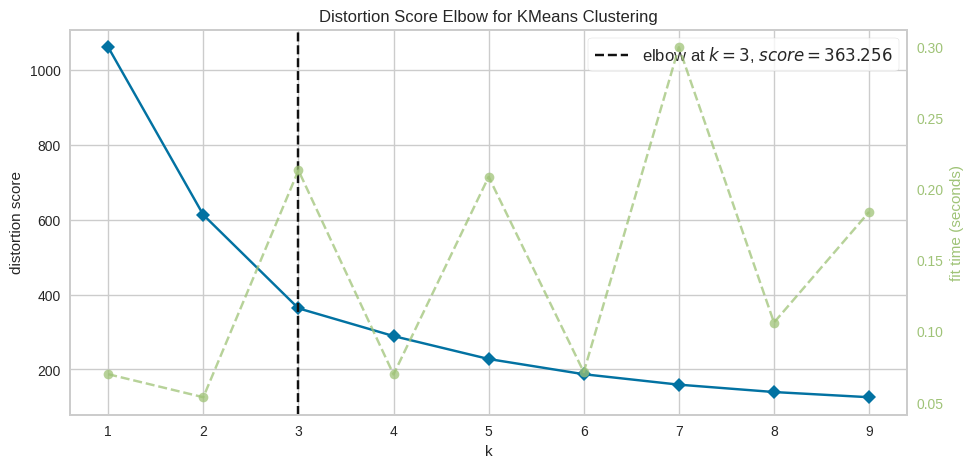

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500),)

visualizer.fit(X)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 3 , init='k-means++',random_state=42, n_init=10)
kmeans.fit(X)

print("silhouette_score is :",silhouette_score(X, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.45796131235999676


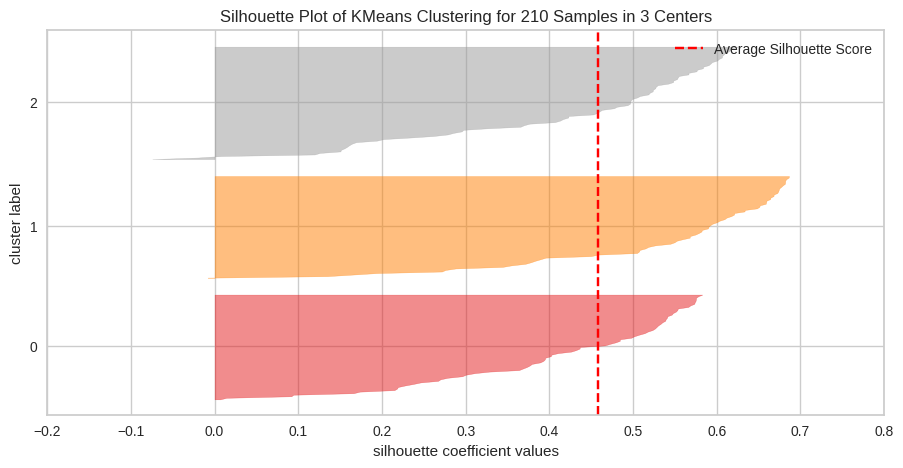

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 210 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans1 = KMeans(n_clusters = 3, init='k-means++',random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(X)
visualizer.show()

In [ ]:
clusters = kmeans.fit_predict(X.iloc[:,1:])
X["label"] = clusters
X.head()

,Perimeter,Length of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class,label
0,14.84,5.763,2.221,5.220,1,1
1,14.57,5.554,1.018,4.956,1,1
2,14.09,5.291,2.699,4.825,1,1
3,13.94,5.324,2.259,4.805,1,1
4,14.99,5.658,1.355,5.175,1,1


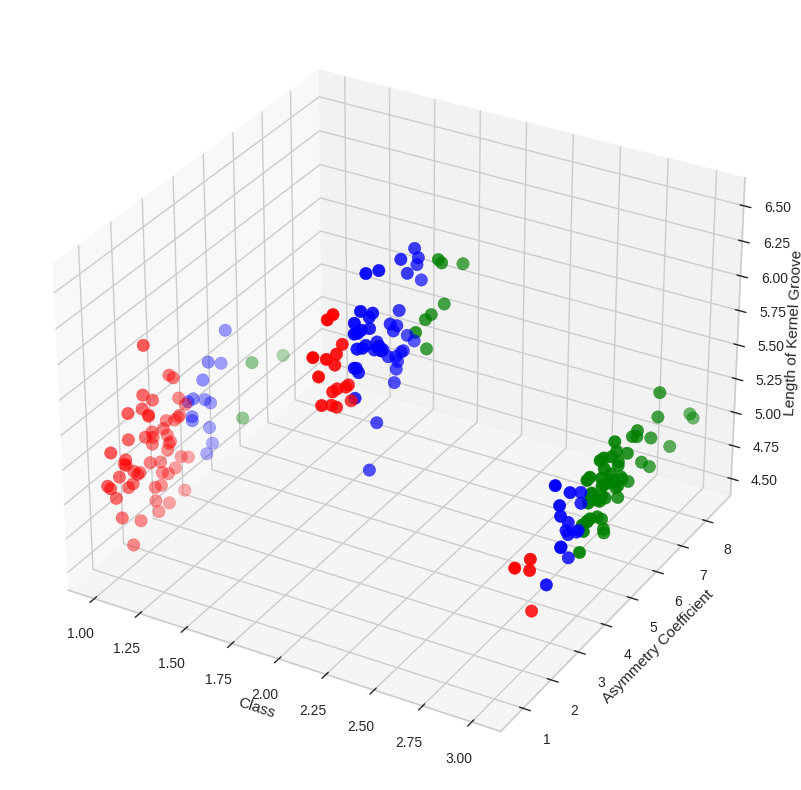

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.Class[X["label"] == 0], X["Asymmetry Coefficient"][X["label"] == 0], X["Length of Kernel Groove"][X["label"] == 0], c='blue', s=80)
ax.scatter(X.Class[X["label"] == 1], X["Asymmetry Coefficient"][X["label"] == 1], X["Length of Kernel Groove"][X["label"] == 1], c='red', s=80)
ax.scatter(X.Class[X["label"] == 2], X["Asymmetry Coefficient"][X["label"] == 2], X["Length of Kernel Groove"][X["label"] == 2], c='green', s=80)
ax.set_xlabel("Class")
ax.set_ylabel("Asymmetry Coefficient")
ax.set_zlabel("Length of Kernel Groove")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced = pca.fit_transform(seed_clean)
PCA_components = pd.DataFrame(reduced, columns=['PCA 1', 'PCA 2', 'PCA 3'])

silhouette_avg = silhouette_score(PCA_components, model.labels_, metric='euclidean')
print("Silhouette Score is:", silhouette_avg)


Silhouette Score is: 0.35681506550998987


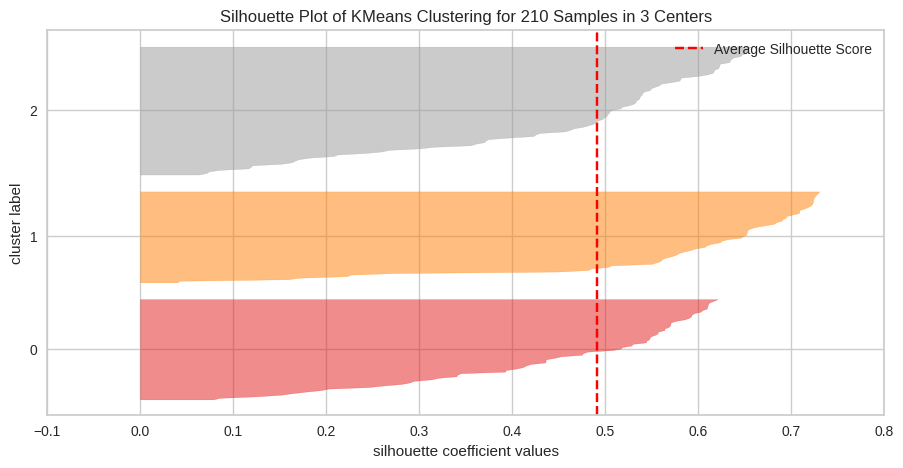

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 210 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model1 = KMeans(n_clusters = 3, init='k-means++',n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(model1,size=(1080, 500))
visualizer.fit(PCA_components.iloc[:,:2])
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init=10)
clusters = kmeans.fit_predict(X)
X['label'] = clusters
X.head()

,Perimeter,Length of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class,label
0,14.84,5.763,2.221,5.220,1,0
1,14.57,5.554,1.018,4.956,1,0
2,14.09,5.291,2.699,4.825,1,0
3,13.94,5.324,2.259,4.805,1,0
4,14.99,5.658,1.355,5.175,1,0


In [ ]:
fig = px.scatter_3d(X, x="Perimeter", y="Asymmetry Coefficient", z="Length of Kernel Groove",
                    color = 'label', size = 'label')

fig.show()

## **Hierarki Klaster**

In [ ]:
hc = AgglomerativeClustering(n_clusters=8,metric='euclidean',linkage='ward')
y_pred= hc.fit_predict(X)

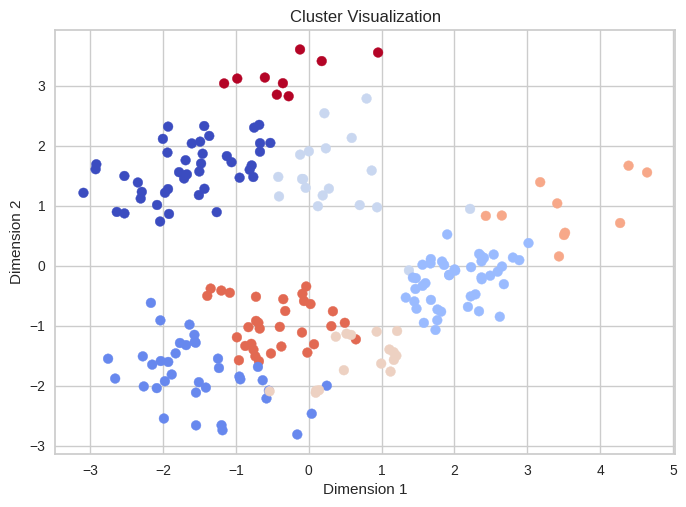

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap='coolwarm')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data['Cluster'] = y_pred

fig = px.scatter_3d(reduced_data, x='Dimension 1', y='Dimension 2', z='Cluster', color='Cluster', labels={'Cluster': 'Cluster'})
fig.update_layout(scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Cluster'))
fig.update_traces(marker=dict(size=3))
fig.show()

# Metode Single

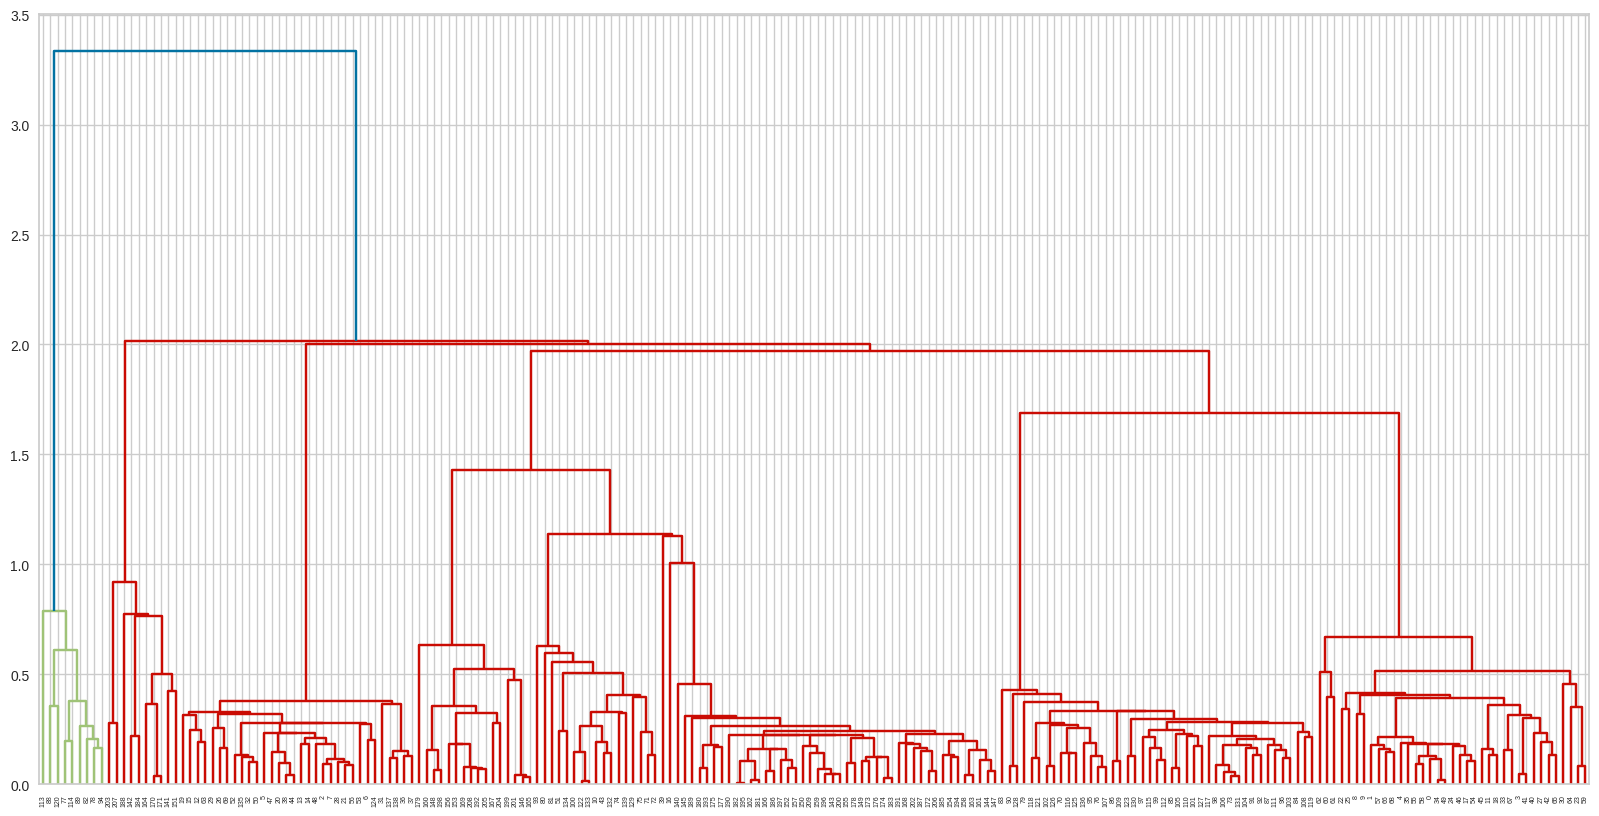

In [ ]:
plt.figure(figsize=(20,10))
dendrogram1 = sch.dendrogram(sch.linkage(reduced_data, method='single'))

In [ ]:
hc1 = AgglomerativeClustering(n_clusters=8, affinity = "euclidean", linkage = "single")
hc1.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=8)

In [ ]:
y_hc1 = hc1.fit_predict(reduced_data)
y_hc1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([5, 5, 7, 5, 5, 7, 7, 7, 5, 5, 3, 5, 7, 7, 7, 7, 0, 5, 5, 7, 7, 7,
       5, 5, 5, 5, 7, 5, 7, 7, 5, 7, 7, 5, 5, 5, 7, 7, 7, 0, 5, 5, 5, 3,
       7, 5, 5, 7, 7, 5, 7, 3, 7, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 7, 4, 3, 3, 4, 3, 3, 4, 1, 1, 4, 3, 3, 1, 4, 4, 4, 4, 4,
       1, 1, 4, 4, 4, 3, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 3, 4, 7, 4, 4, 4, 4, 3, 4, 4,
       3, 3, 3, 7, 4, 7, 7, 3, 0, 2, 2, 0, 0, 0, 6, 0, 6, 0, 0, 2, 0, 6,
       0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 2, 6, 0, 6, 0, 6, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 6, 0, 6, 0, 2, 6, 6, 0, 2, 6, 0])

In [ ]:
reduced_data['cluster_hc'] = y_hc1
reduced_data.head()

,Dimension 1,Dimension 2,Cluster,cluster_hc
0,-1.569467,-1.152938,1,5
1,-2.264653,-2.013173,1,5
2,-0.683679,-1.592325,6,7
3,-0.939087,-1.894368,1,5
4,-2.278027,-1.511615,1,5


In [ ]:
score1 = silhouette_score(reduced_data, hc1.labels_, random_state=0)
score1

0.7321137425839189

In [ ]:
reduced_data['cluster_hc'].value_counts()

0    46
4    43
5    37
7    32
3    17
6    16
2    10
1     9
Name: cluster_hc, dtype: int64

# Metode Average

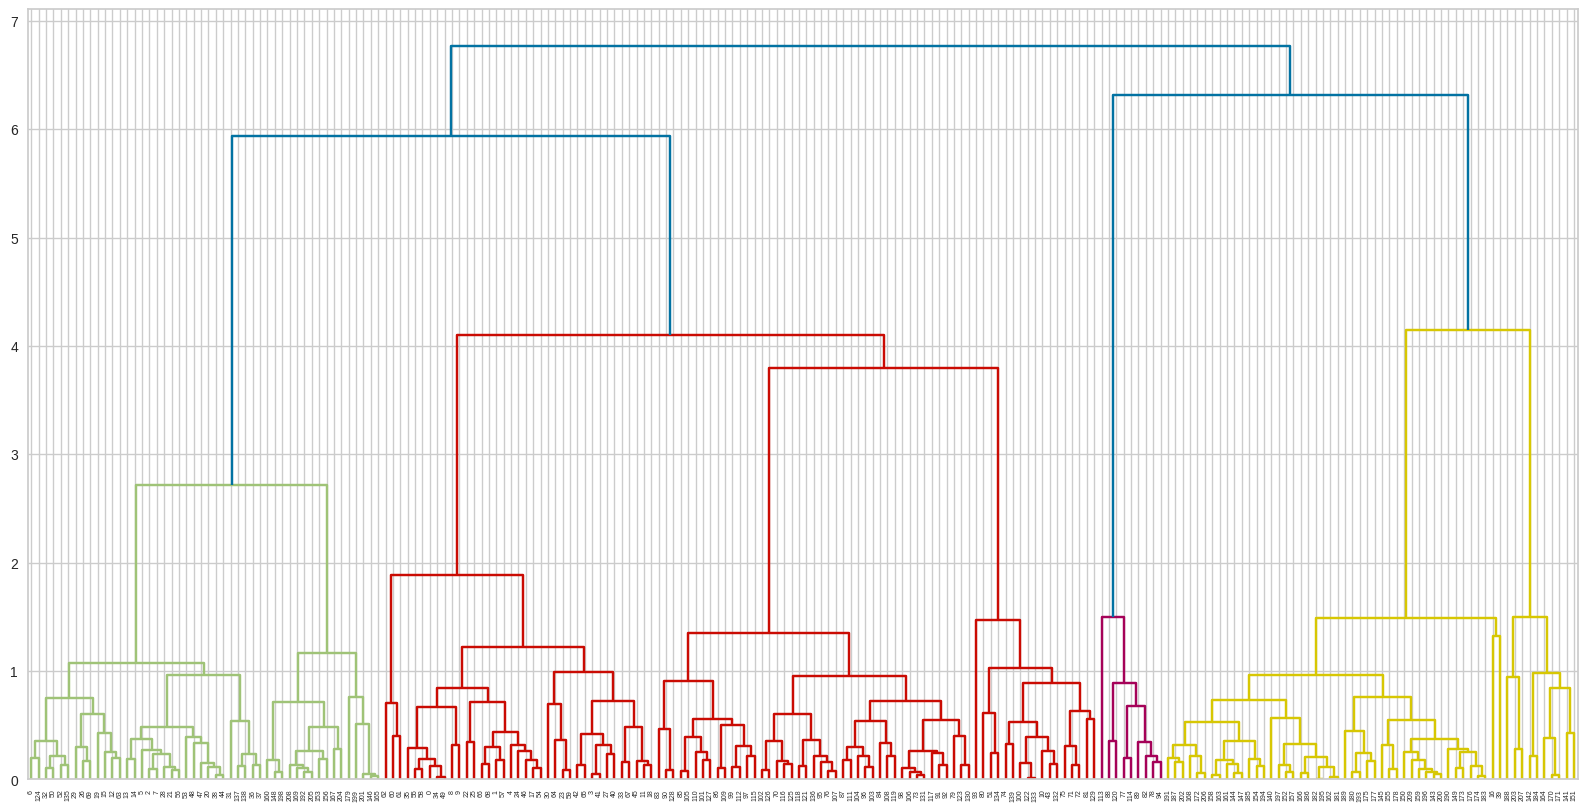

In [ ]:
plt.figure(figsize=(20,10))
dendrogram2 = sch.dendrogram(sch.linkage(reduced_data, method='average'))

In [ ]:
hc2 = AgglomerativeClustering(n_clusters=8, affinity = "euclidean", linkage = "average")
hc2.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=8)

In [ ]:
y_hc2 = hc2.fit_predict(reduced_data)
y_hc2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 7, 0, 0, 7, 7, 7, 0, 0, 3, 0, 7, 7, 7, 7, 4, 0, 0, 7, 7, 7,
       0, 0, 0, 0, 7, 0, 7, 7, 0, 7, 7, 0, 0, 0, 7, 7, 7, 4, 0, 0, 0, 3,
       7, 0, 0, 7, 7, 0, 7, 3, 7, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 7, 6, 3, 3, 6, 3, 3, 6, 2, 2, 6, 3, 3, 2, 6, 6, 6, 6, 6,
       2, 2, 6, 6, 6, 3, 2, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 2, 6, 3, 6, 7, 6, 6, 6, 6, 3, 6, 6,
       3, 3, 3, 7, 6, 7, 7, 3, 4, 1, 1, 4, 4, 4, 5, 4, 5, 4, 4, 1, 4, 5,
       4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 1, 5, 4, 5, 4, 5, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       5, 5, 4, 5, 4, 1, 5, 5, 4, 1, 5, 4])

In [ ]:
reduced_data['cluster_hc2'] = y_hc2
reduced_data.head()

,Dimension 1,Dimension 2,Cluster,cluster_hc,cluster_hc2
0,-1.569467,-1.152938,1,5,0
1,-2.264653,-2.013173,1,5,0
2,-0.683679,-1.592325,6,7,7
3,-0.939087,-1.894368,1,5,0
4,-2.278027,-1.511615,1,5,0


In [ ]:
score2 = silhouette_score(reduced_data, hc2.labels_, random_state=0)
score2

0.7901608306942126

In [ ]:
reduced_data["cluster_hc2"].value_counts()

4    46
6    43
0    37
7    32
3    17
5    16
1    10
2     9
Name: cluster_hc2, dtype: int64

# Metode Complete

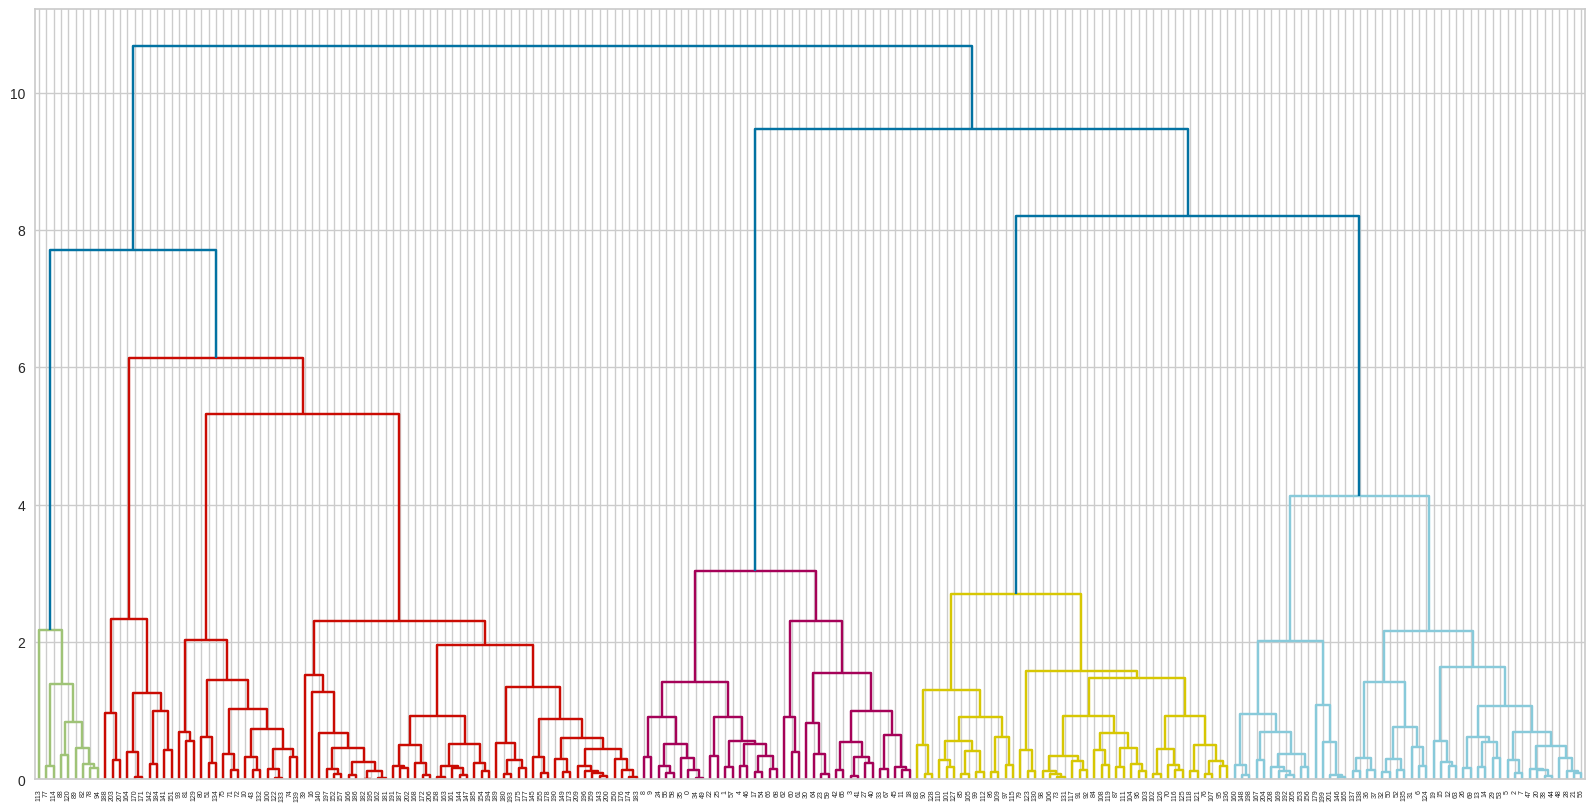

In [ ]:
plt.figure(figsize=(20,10))
dendrogram3 = sch.dendrogram(sch.linkage(reduced_data, method='complete'))

In [ ]:
hc3 = AgglomerativeClustering(n_clusters=8, affinity = "euclidean", linkage = "complete")
hc3.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=8)

In [ ]:
y_hc3 = hc2.fit_predict(reduced_data)
y_hc3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 7, 0, 0, 7, 7, 7, 0, 0, 6, 0, 7, 7, 7, 7, 4, 0, 0, 7, 7, 7,
       0, 0, 0, 0, 7, 0, 7, 7, 0, 7, 7, 0, 0, 0, 7, 7, 7, 4, 0, 0, 0, 6,
       7, 0, 0, 7, 7, 0, 7, 6, 7, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 7, 3, 6, 6, 3, 6, 6, 3, 1, 1, 3, 6, 6, 1, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 6, 1, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 6, 3, 7, 3, 3, 3, 3, 6, 3, 3,
       6, 6, 6, 7, 3, 7, 7, 6, 4, 2, 2, 4, 4, 4, 5, 4, 5, 4, 4, 2, 4, 5,
       4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 2, 5, 4, 5, 4, 5, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       5, 5, 4, 5, 4, 2, 5, 5, 4, 2, 5, 4])

In [ ]:
reduced_data['cluster_hc3'] = y_hc3
reduced_data.head()

,Dimension 1,Dimension 2,Cluster,cluster_hc,cluster_hc2,cluster_hc3
0,-1.569467,-1.152938,1,5,0,0
1,-2.264653,-2.013173,1,5,0,0
2,-0.683679,-1.592325,6,7,7,7
3,-0.939087,-1.894368,1,5,0,0
4,-2.278027,-1.511615,1,5,0,0


In [ ]:
score3 = silhouette_score(reduced_data, hc3.labels_, random_state=0)
score3

0.820452247527379

In [ ]:
reduced_data["cluster_hc3"].value_counts()

4    46
3    43
0    37
7    32
6    17
5    16
2    10
1     9
Name: cluster_hc3, dtype: int64

# Metode Ward

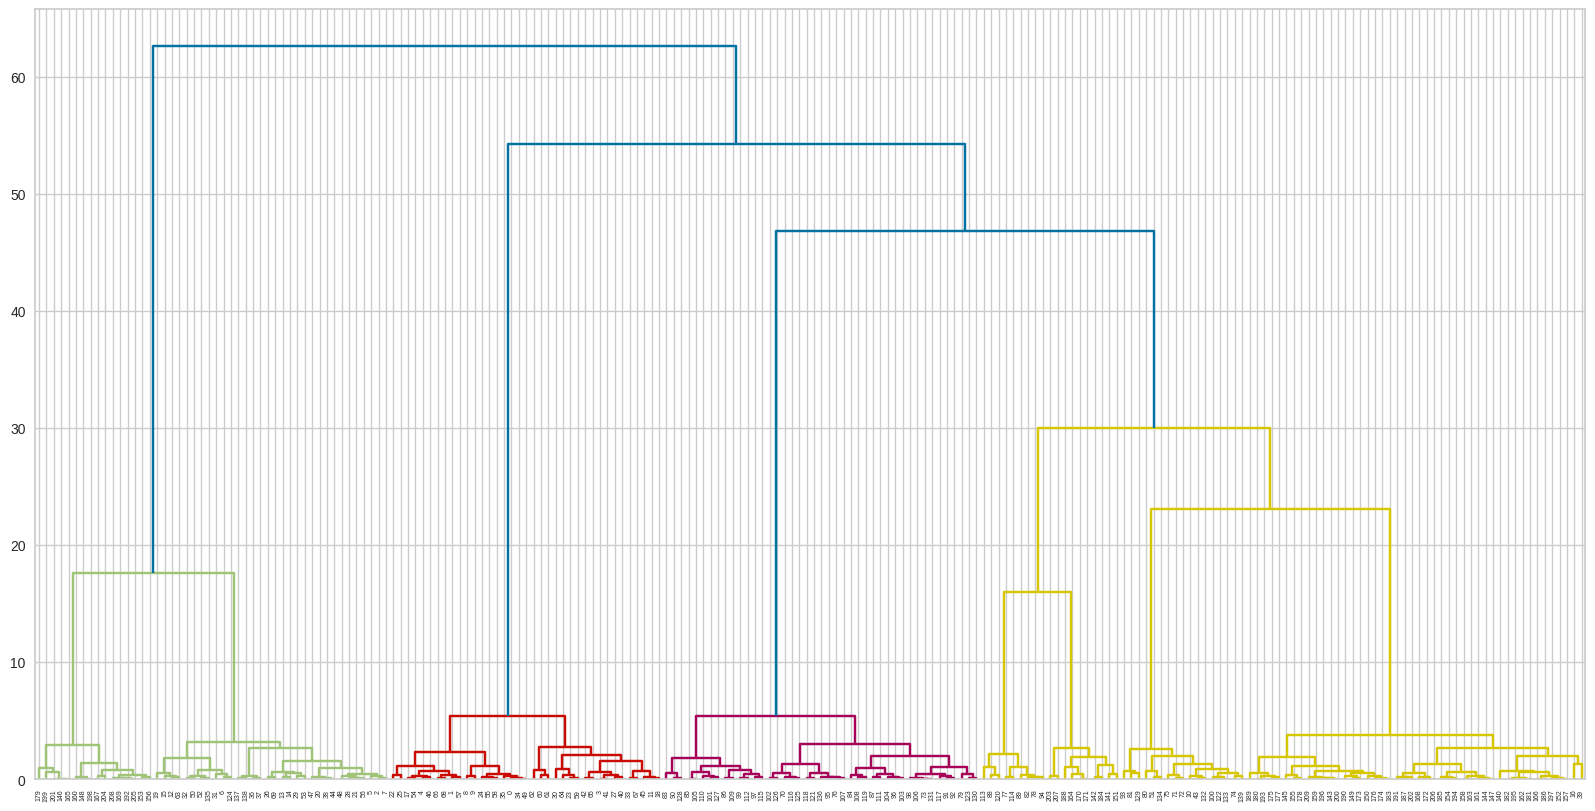

In [ ]:
plt.figure(figsize=(20,10))
dendrogram4 = sch.dendrogram(sch.linkage(reduced_data, method='ward'))

In [ ]:
hc4 = AgglomerativeClustering(n_clusters=8, affinity = "euclidean", linkage = "ward")
hc4.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=8)

In [ ]:
y_hc4 = hc4.fit_predict(reduced_data)
y_hc4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 5, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 5,
       3, 2, 2, 3, 3, 2, 3, 5, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 0, 5, 5, 0, 5, 5, 0, 7, 7, 0, 5, 5, 7, 0, 0, 0, 0, 0,
       7, 7, 0, 0, 0, 5, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 7, 0, 5, 0, 3, 0, 0, 0, 0, 5, 0, 0,
       5, 5, 5, 3, 0, 3, 3, 5, 1, 4, 4, 1, 1, 1, 6, 1, 6, 1, 1, 4, 1, 6,
       1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 4, 6, 1, 6, 1, 6, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 6, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 6, 1, 1, 1, 1, 1,
       6, 6, 1, 6, 1, 4, 6, 6, 1, 4, 6, 1])

In [ ]:
reduced_data['cluster_hc4'] = y_hc4
reduced_data.head()

,Dimension 1,Dimension 2,Cluster,cluster_hc,cluster_hc2,cluster_hc3,cluster_hc4
0,-1.569467,-1.152938,1,5,0,0,2
1,-2.264653,-2.013173,1,5,0,0,2
2,-0.683679,-1.592325,6,7,7,7,3
3,-0.939087,-1.894368,1,5,0,0,2
4,-2.278027,-1.511615,1,5,0,0,2


In [ ]:
score4 = silhouette_score(reduced_data, hc4.labels_, random_state=0)
score4

0.8487018273944541

In [ ]:
reduced_data["cluster_hc4"].value_counts()

1    46
0    43
2    37
3    32
5    17
6    16
4    10
7     9
Name: cluster_hc4, dtype: int64

# **DBScan**

In [ ]:
from sklearn.cluster import DBSCAN
from itertools import product

dbscan = DBSCAN(eps=1, min_samples=4)
labels = dbscan.fit_predict(reduced_data)

In [ ]:
score = silhouette_score(reduced_data, labels, random_state=0)
score

0.7629288027977441

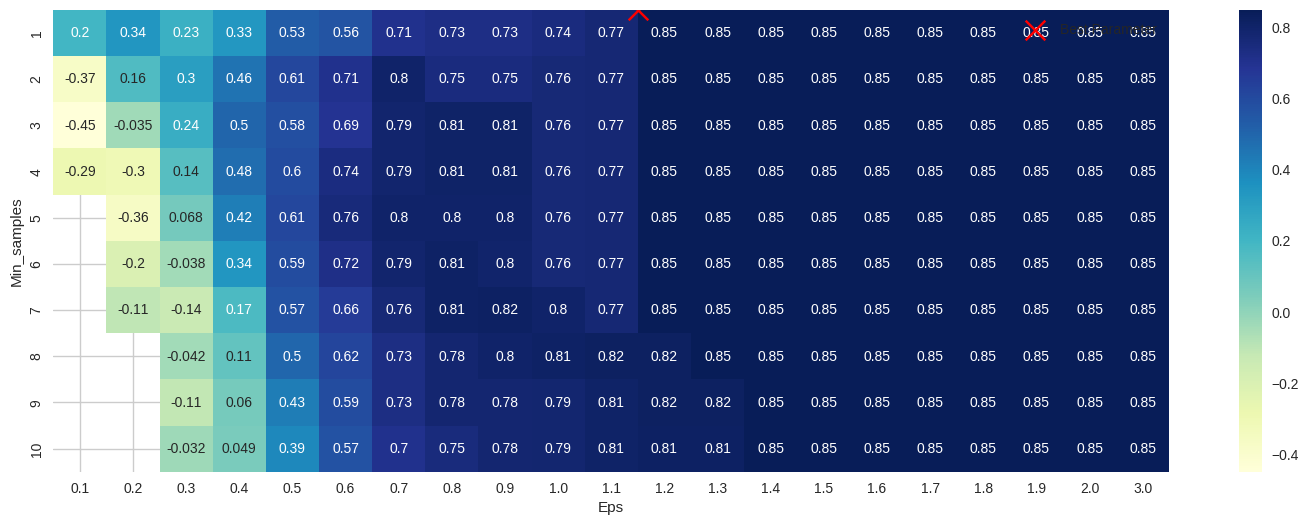

Best Parameters: eps=1.2, min_samples=1.0, Silhouette Score=0.85


In [ ]:
import seaborn as sns

# Define parameter ranges
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,3.0]
min_samples_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize lists to store parameter values and silhouette scores
DBSCAN_params = []
sil_score = []

# Iterate over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(reduced_data)

        # Check if there are more than one cluster
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(reduced_data, labels)
            DBSCAN_params.append((eps, min_samples))
            sil_score.append(silhouette_avg)

# Create DataFrame
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

# Pivot table for heatmap
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

# Extract best parameters
best_params = tmp.loc[tmp['Sil_score'].idxmax()]

# Plotting heatmap
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

# Highlight best parameter
best_eps_index = np.where(eps_values == best_params['Eps'])[0][0]
best_min_samples_index = np.where(min_samples_values == best_params['Min_samples'])[0][0]
ax.scatter([best_eps_index], [best_min_samples_index], marker='x', color='red', s=200, label='Best Parameter')Z
ax.legend()

plt.show()

print(f"Best Parameters: eps={best_params['Eps']}, min_samples={best_params['Min_samples']}, Silhouette Score={best_params['Sil_score']:.2f}")

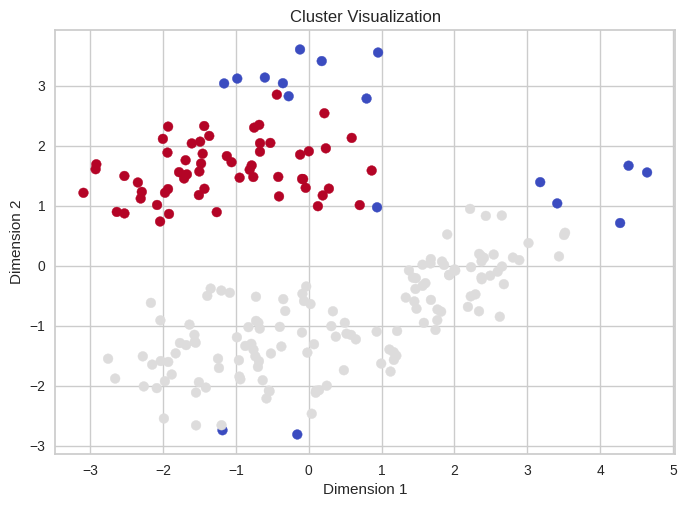

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(seed_clean)

# Fit DBSCAN with the best parameters
dbscan = DBSCAN(eps=1.2, min_samples=1)
labels = dbscan.fit_predict(reduced_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='coolwarm')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()